# Importing Library

In [3]:
import pandas as pd
import numpy as np

#Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

# Load the Data

In [4]:
df=pd.read_csv("loan.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Problem Statement

Need to identify the factors affecting the loss of business to the company. 

In [9]:
df.isnull().mean()

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
                                ...   
tax_liens                     0.000982
tot_hi_cred_lim               1.000000
total_bal_ex_mort             1.000000
total_bc_limit                1.000000
total_il_high_credit_limit    1.000000
Length: 111, dtype: float64

In [10]:
df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
                              ...  
tax_liens                         1
tot_hi_cred_lim                   0
total_bal_ex_mort                 0
total_bc_limit                    0
total_il_high_credit_limit        0
Length: 111, dtype: int64

In [13]:
print(df.columns.tolist())

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il

In [24]:
num_cols=["loan_amnt","funded_amnt","funded_amnt_inv","annual_inc","open_acc","revol_bal","revol_util","total_acc","total_pymnt","out_prncp_inv","total_rec_prncp","total_rec_int"]
cat_cols=["tax_liens","loan_status","verification_status","home_ownership","grade"]
extra_cols=["id","member_id","addr_state"]
rate_cols=["int_rate"]
len(num_cols)+len(cat_cols)+len(extra_cols)

20

# EDA - Exploratory Data Analysis

# Univariate Analysis

# Numerical Columns

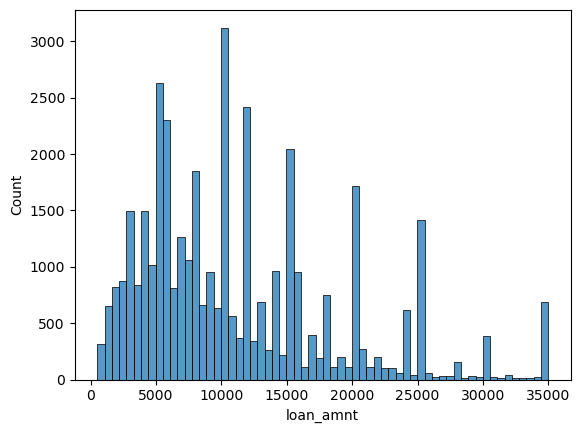

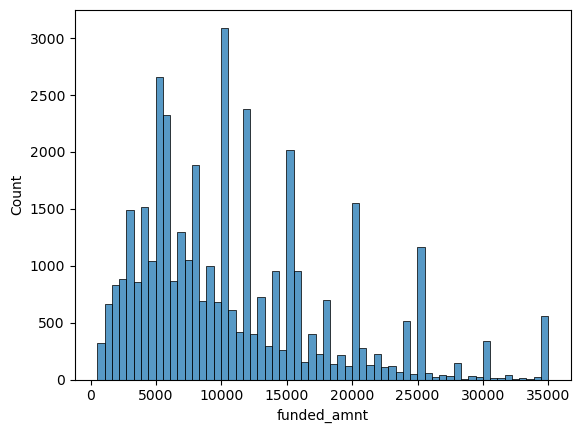

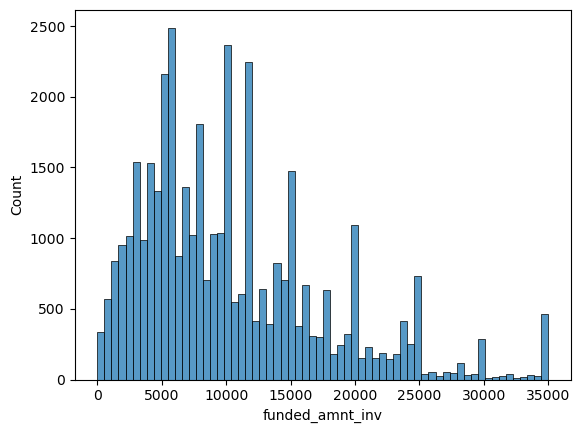

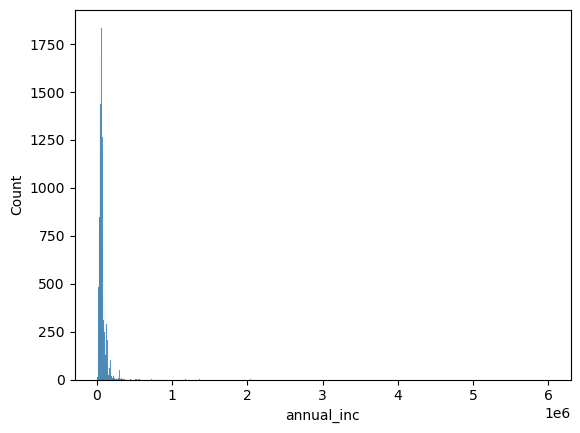

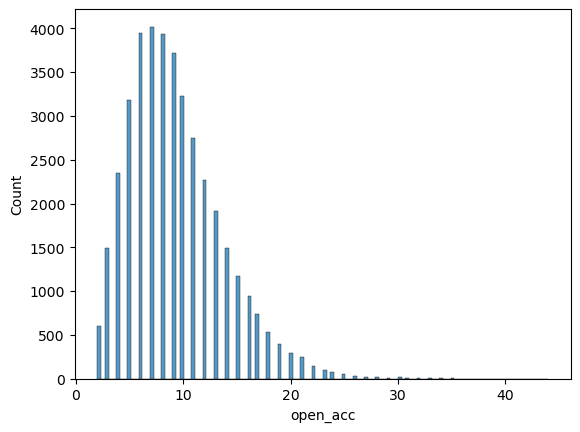

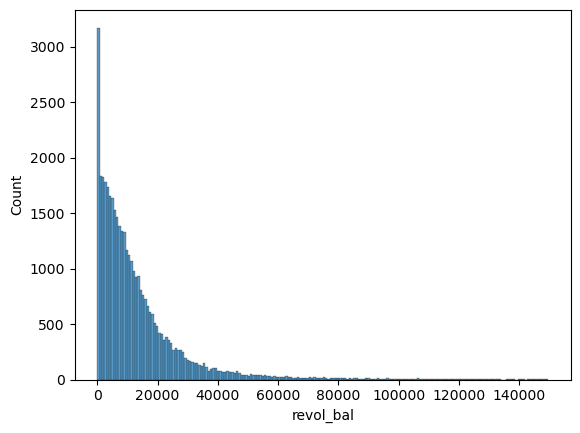

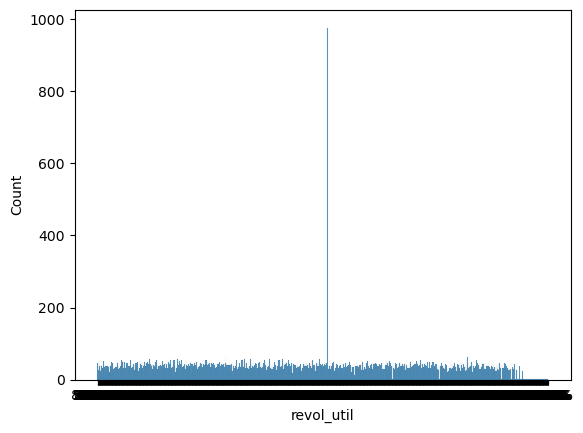

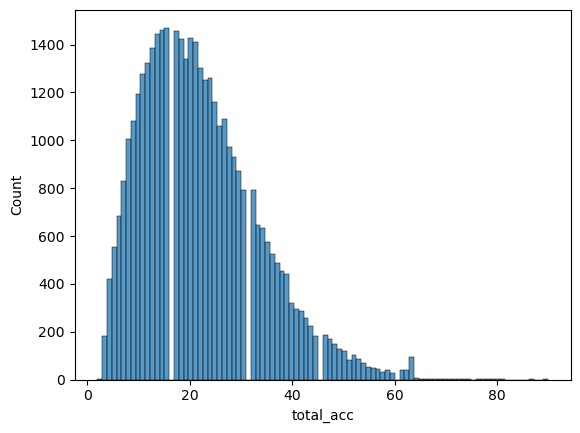

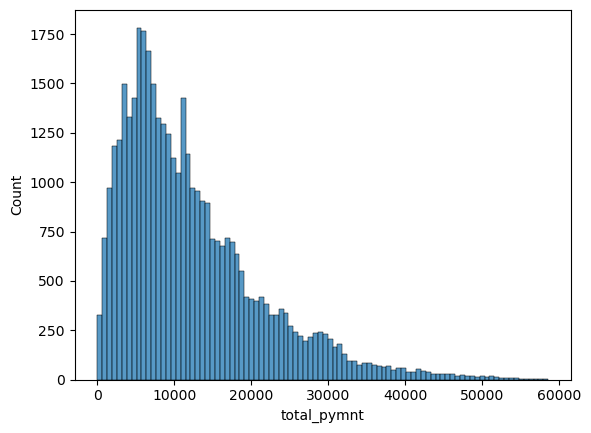

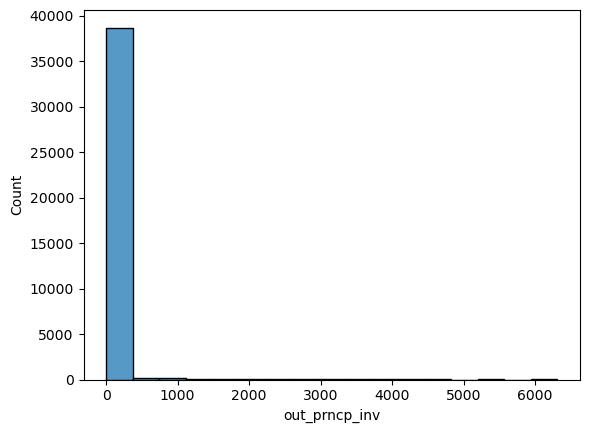

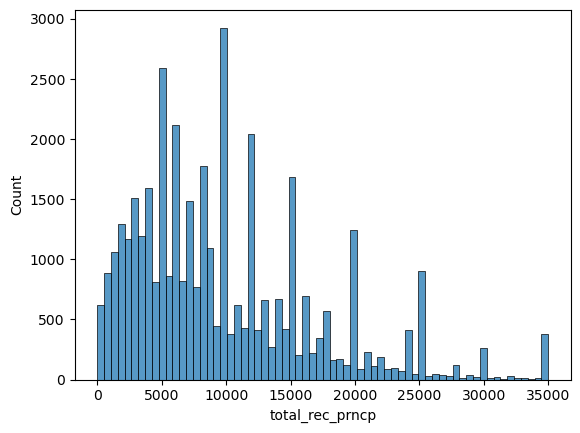

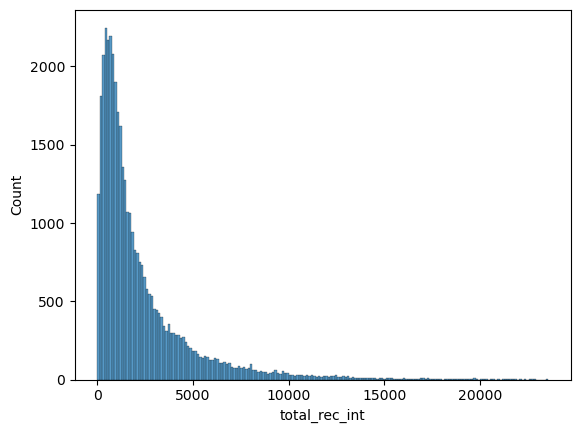

In [25]:
for i in num_cols:
    sns.histplot(x=df[i])
    plt.show()

# Insights
Loan Amount should be less when borrower have more than one credit lines account.
In the histplot shows when borrower has 10 credit lines account they have more loans that's leads to defaulter.

# Categorical Columns

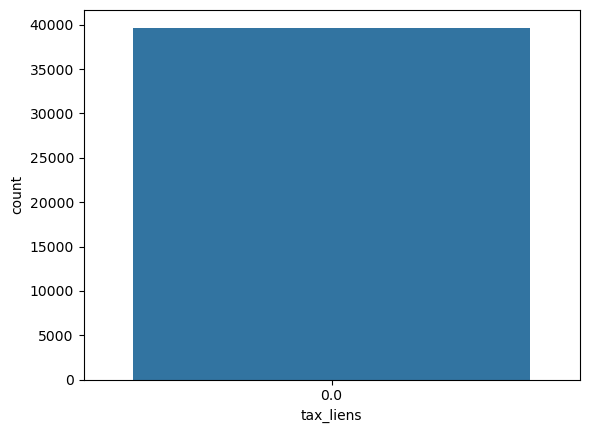

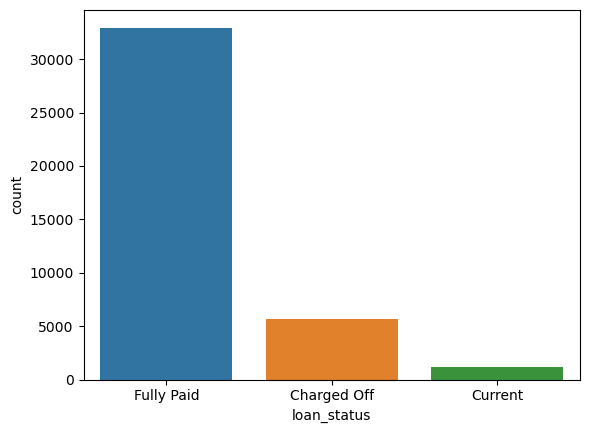

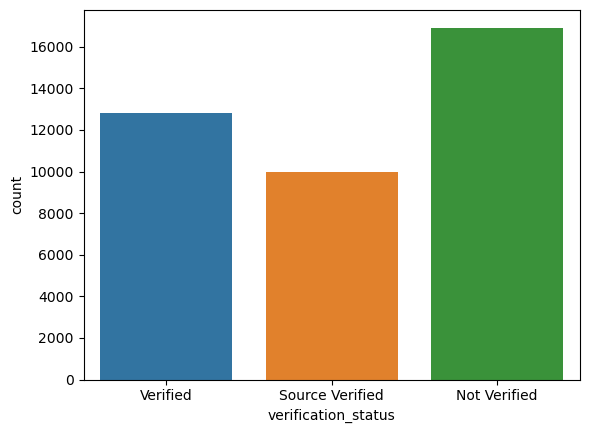

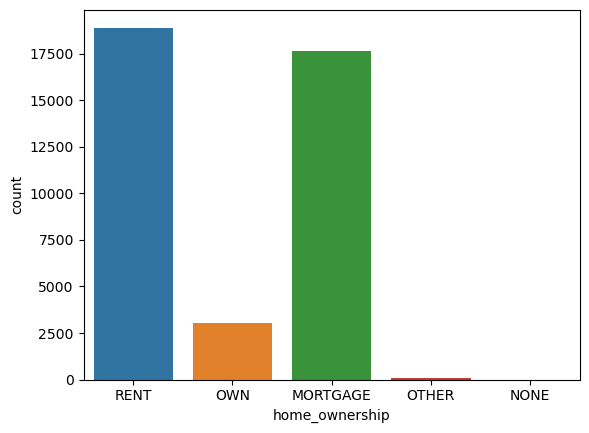

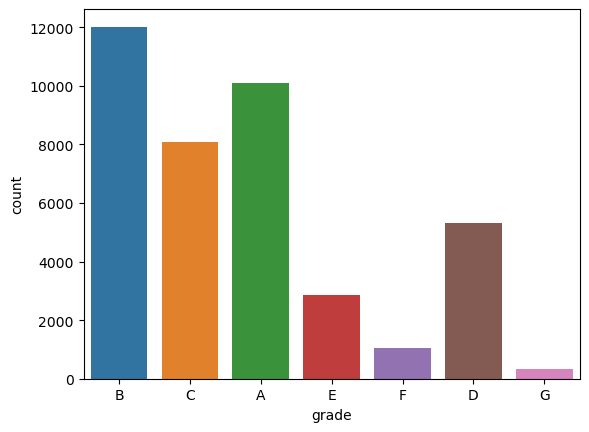

In [26]:
for i in cat_cols:
    sns.countplot(x=df[i])
    plt.show()

# Insights
1. When customer is not verified, loan should not be given.
2. Maximum loan is given to the customer who have Rented or Mortgage house.

# Bivariate Analysis
Analysis with two variables
Relationship with two variables - Scatterplot, boxplot, barplot etc

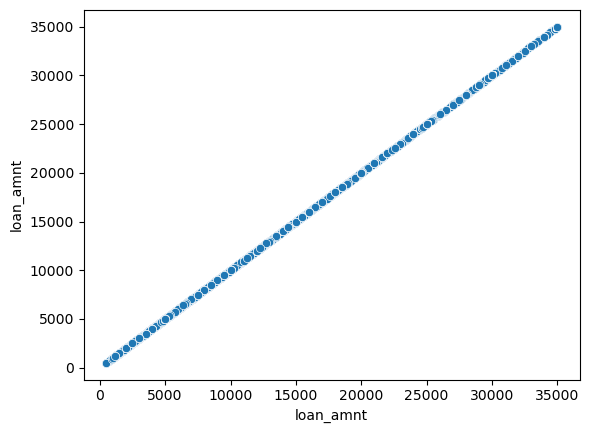

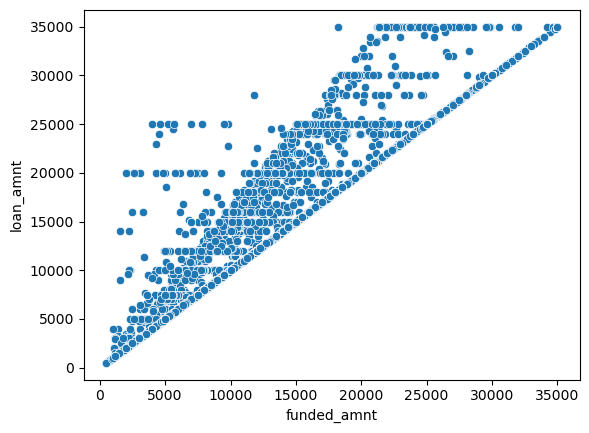

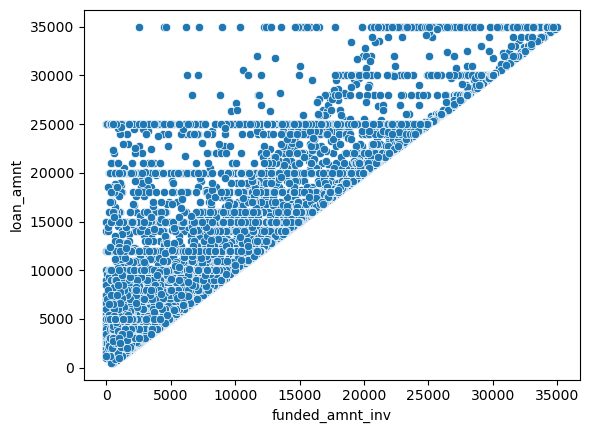

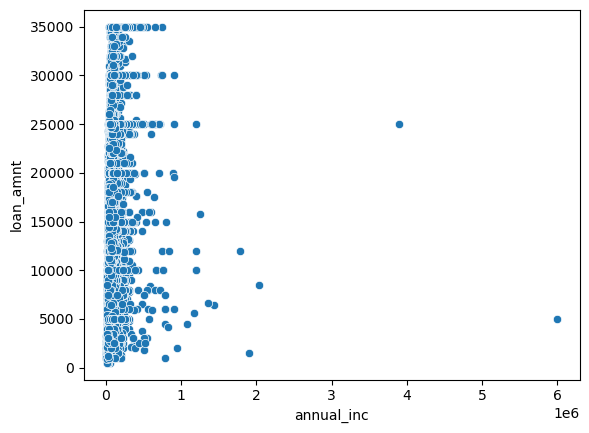

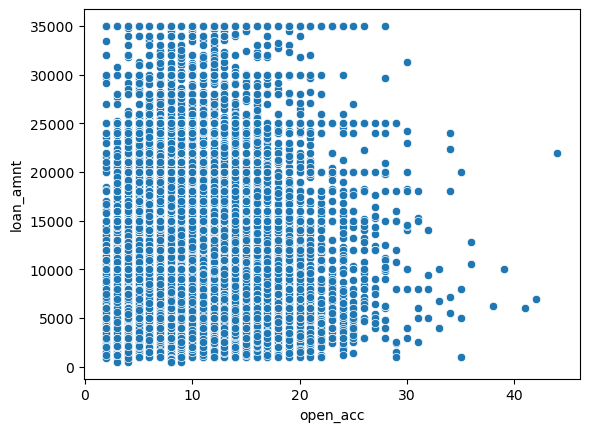

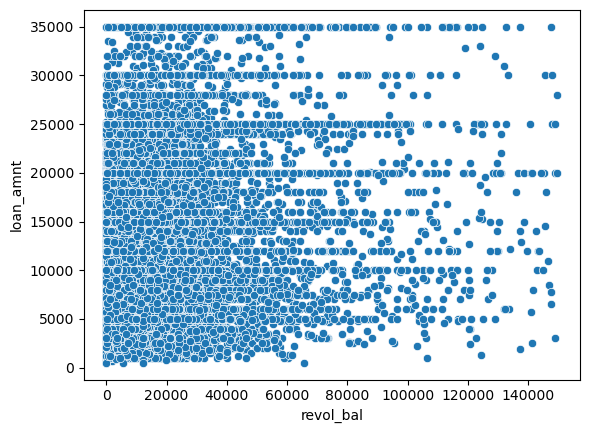

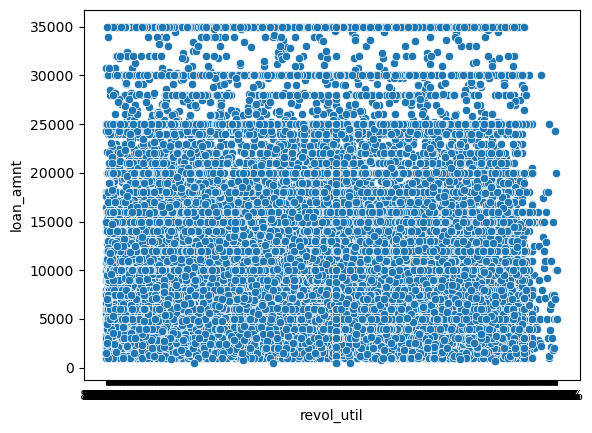

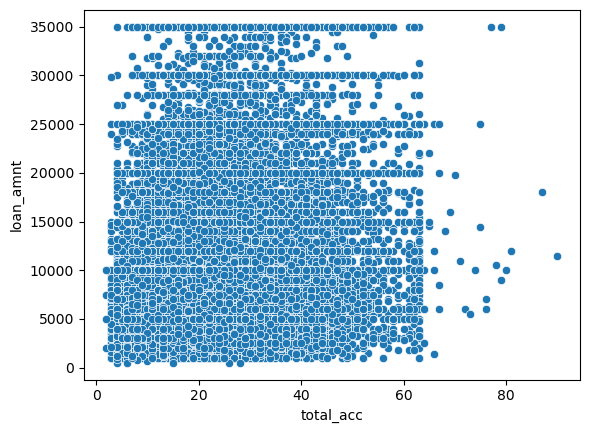

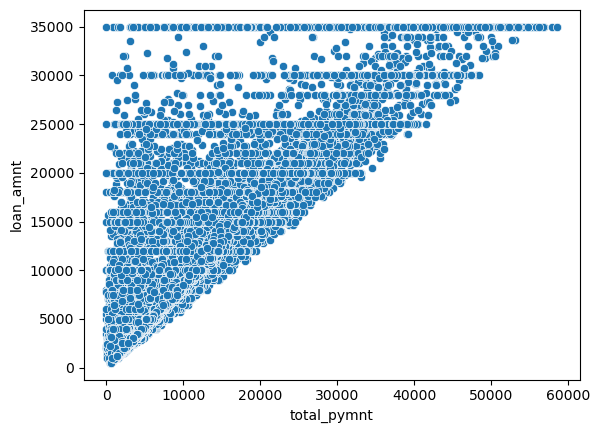

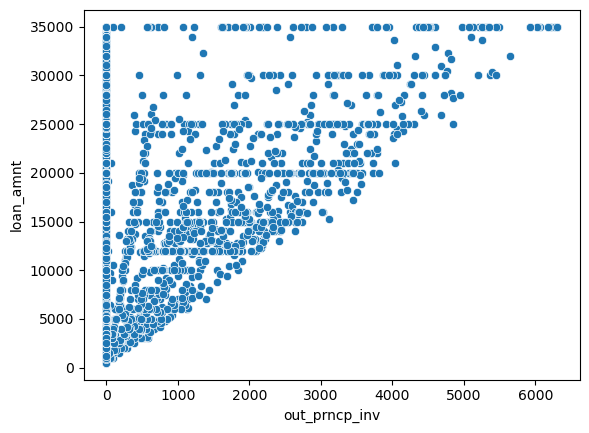

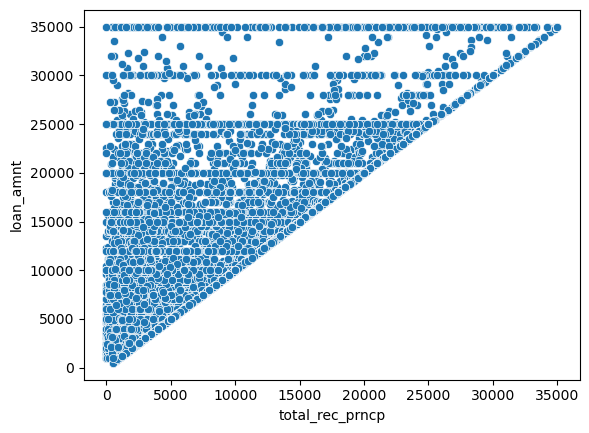

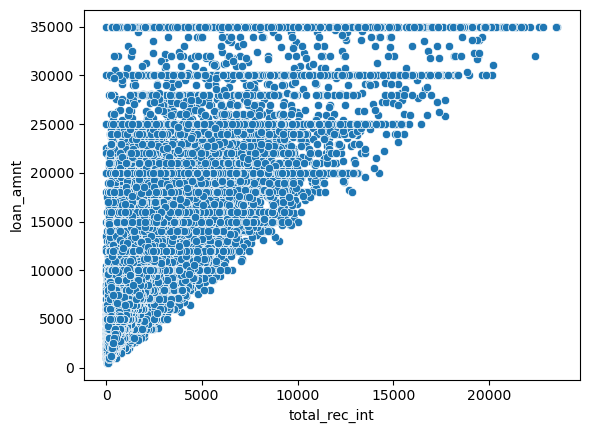

In [27]:
for i in num_cols:
    sns.scatterplot(x=df[i],y=df["loan_amnt"])
    plt.show()

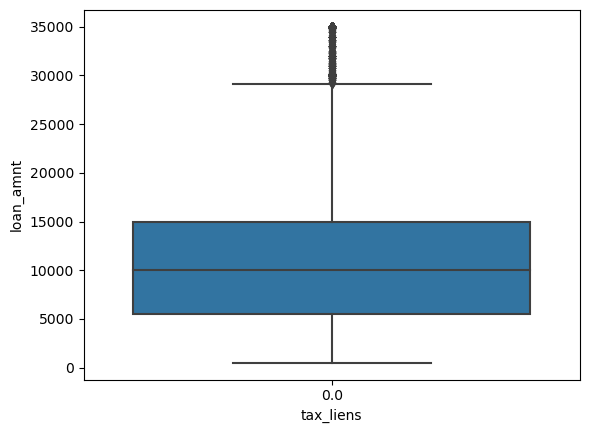

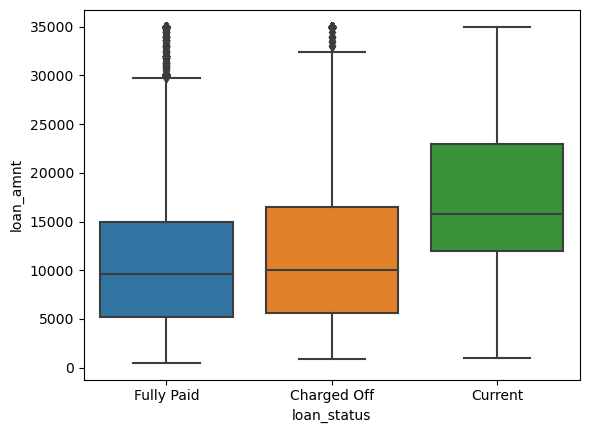

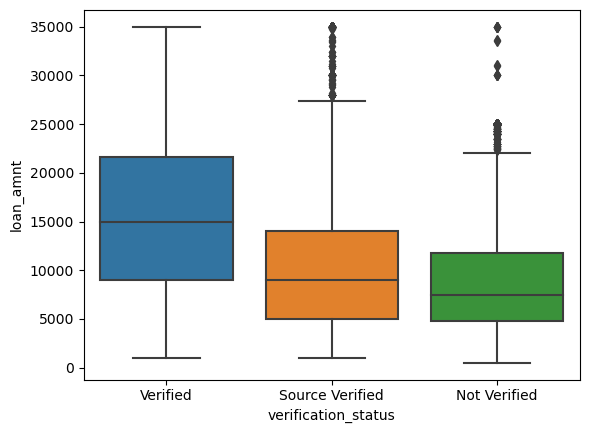

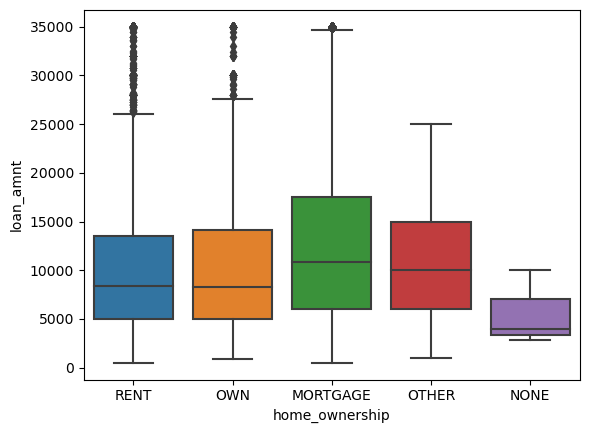

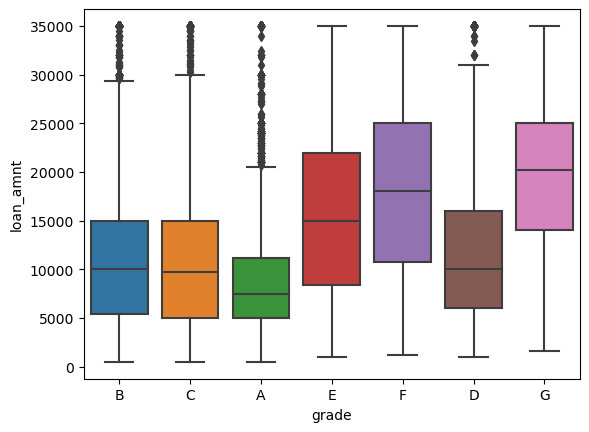

In [31]:
for i in cat_cols:
    sns.boxplot(x=df[i],y=df["loan_amnt"])
    plt.show()

# Insights
1. Loan should be given only for verified customer
2. Maximum loan given to the Rented or Mortgage customer
3. Avoid to give loan, who has lower grade

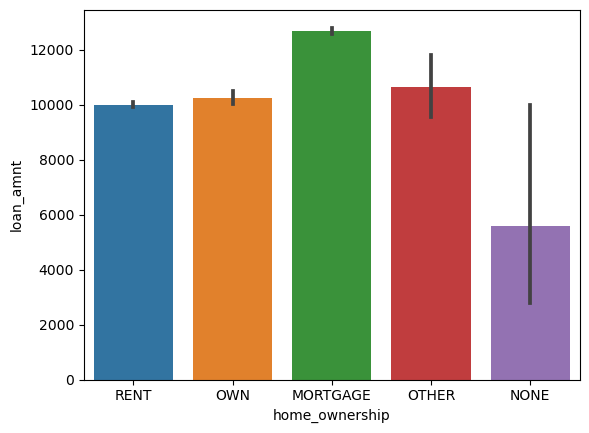

In [48]:
sns.barplot(x=df["home_ownership"],y=df["loan_amnt"])
plt.show()

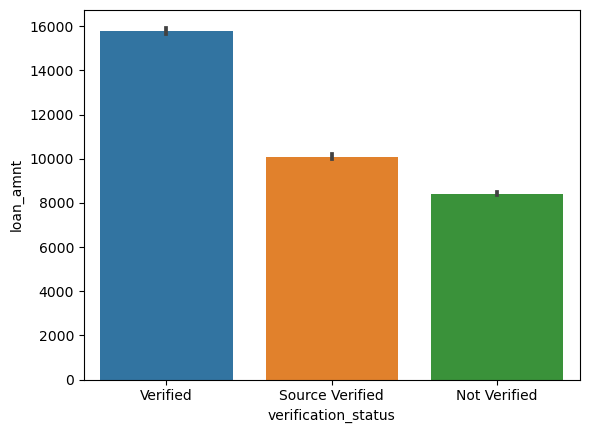

In [52]:
sns.barplot(x=df["verification_status"],y=df["loan_amnt"])
plt.show()

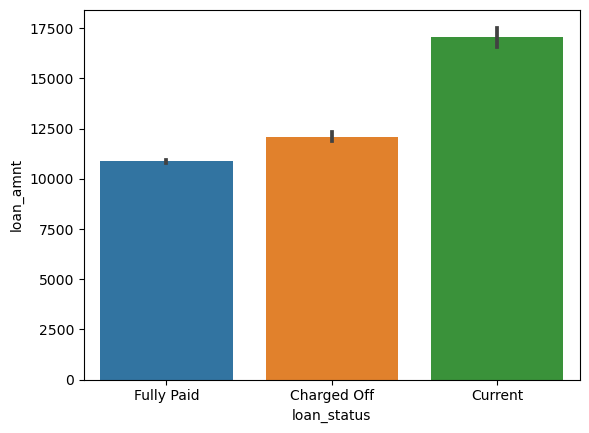

In [53]:
sns.barplot(x=df["loan_status"],y=df["loan_amnt"])
plt.show()

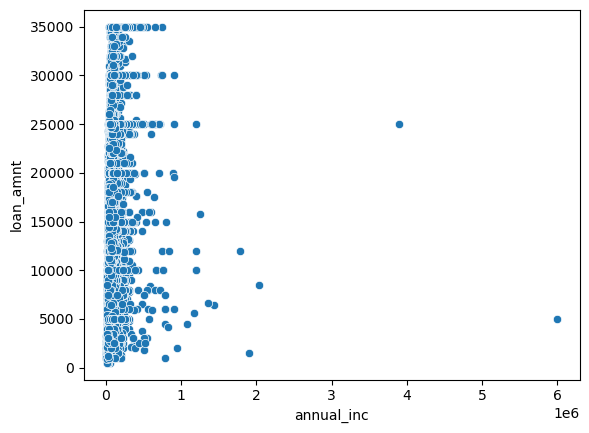

In [50]:
sns.scatterplot(x=df["annual_inc"],y=df["loan_amnt"])
plt.show()

# Multivariate Analysis
Heatmap

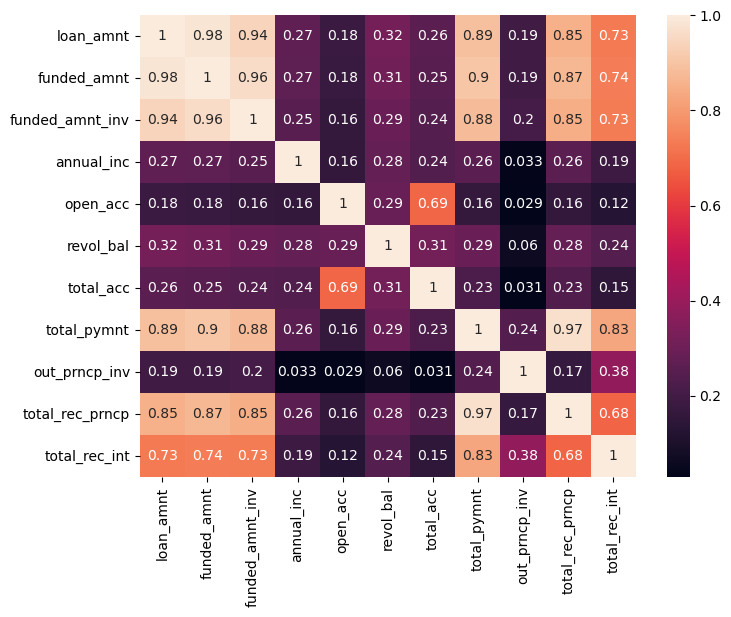

In [62]:
num_cols1=["loan_amnt","funded_amnt","funded_amnt_inv","annual_inc","open_acc","revol_bal","total_acc","total_pymnt","out_prncp_inv","total_rec_prncp","total_rec_int"]
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols1].corr(),annot=True)
plt.show()

# Insights
1. Loan amount and open account has Correlation 0.18, That measns customer has more credit account likely to be a defaulter. 